
Applying TOPSIS with jaccard similarity:
A1 to A29 = 5, 6, 11, 23, 13, 12, 17, 15, 16, 27, 29, 18, 28, 26, 21, 24, 25, 14, 8, 20, 2, 3, 7, 9, 10, 19, 22, 4, 1

Detailed Similarity Report (jaccard):
----------------------------------------------------------------
Alternative | Similarity to Ideal | Similarity to Negative Ideal | Performance Score | Ranking Order
----------------------------------------------------------------
A01         | 0.1844           | 0.9017         | 0.1698            | 25
A02         | 0.1883           | 0.8382         | 0.1834            | 24
A03         | 0.2070           | 0.7698         | 0.2119            | 19
A04         | 0.4022           | 0.4240         | 0.4868            | 7
A05         | 0.2015           | 0.5458         | 0.2697            | 17
A06         | 0.2108           | 0.7231         | 0.2257            | 18
A07         | 0.4262           | 0.6781         | 0.3860            | 13
A08         | 0.3465           | 0.6381         | 0.3519    

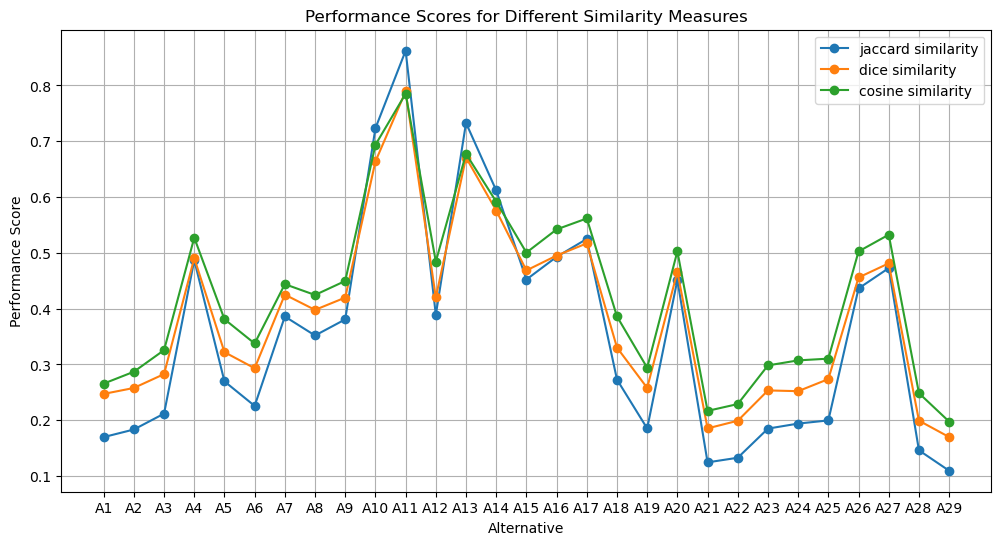

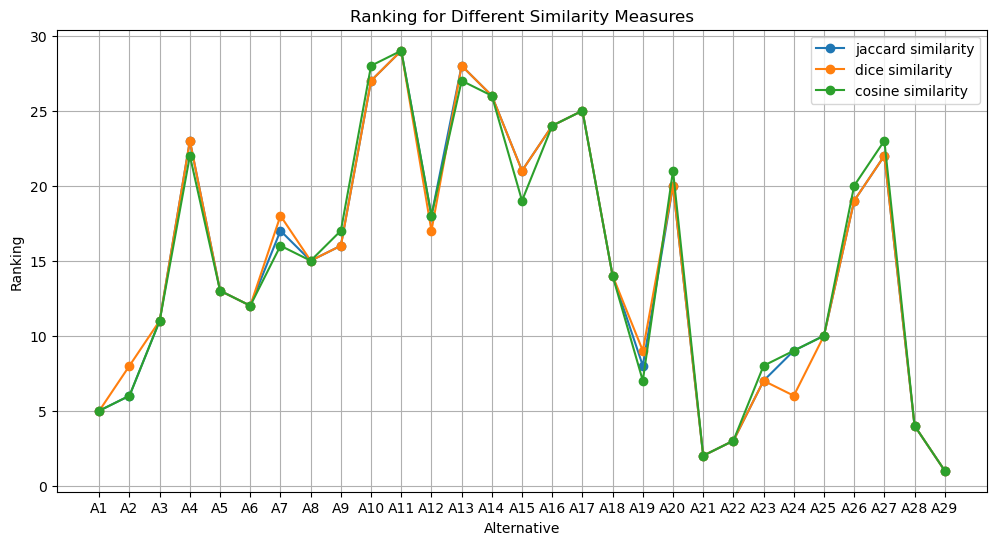

([array([0.16981131, 0.18342997, 0.2118734 , 0.48680461, 0.26966385,
         0.22573053, 0.38596181, 0.35190734, 0.38080085, 0.72334572,
         0.86230377, 0.38888808, 0.73285511, 0.61192547, 0.45223425,
         0.49287515, 0.5249952 , 0.27288077, 0.18532866, 0.45149991,
         0.12452502, 0.13280633, 0.18503888, 0.19404748, 0.19970519,
         0.4362408 , 0.47271187, 0.14612775, 0.10954793]),
  array([0.24721835, 0.25787865, 0.28274559, 0.49066023, 0.32204961,
         0.29323408, 0.42514324, 0.39780458, 0.41987095, 0.6638248 ,
         0.78927627, 0.42006685, 0.67092057, 0.57588208, 0.4685336 ,
         0.49514715, 0.5170127 , 0.33025572, 0.25795969, 0.4663734 ,
         0.18544966, 0.19912387, 0.25346553, 0.25211704, 0.27375099,
         0.45585897, 0.48120926, 0.19931334, 0.16990346]),
  array([0.26567463, 0.28696319, 0.3257185 , 0.52720855, 0.38108804,
         0.33759217, 0.44388124, 0.42453366, 0.44965233, 0.693596  ,
         0.7852696 , 0.48435797, 0.67748668, 0.5917498

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# TOPSIS method with similarity-based adjustments
def topsis_with_similarity(decision_matrix, weights, is_benefit_criteria, sim_type="jaccard"):
    # Step 1: Normalize the decision matrix
    norm_matrix = decision_matrix / np.sqrt((decision_matrix**2).sum(axis=0))

    # Step 2: Multiply the normalized matrix by the weights
    weighted_matrix = norm_matrix * weights

    # Step 3: Determine the ideal and negative ideal solutions for each criterion
    ideal_solution = np.where(is_benefit_criteria, np.max(weighted_matrix, axis=0), np.min(weighted_matrix, axis=0))
    negative_ideal_solution = np.where(is_benefit_criteria, np.min(weighted_matrix, axis=0), np.max(weighted_matrix, axis=0))

    # Step 4: Calculate the similarity to the ideal and negative ideal solutions
    similarity_to_ideal = np.array([
        similarity(weighted_matrix[i], ideal_solution, sim_type=sim_type)
        for i in range(weighted_matrix.shape[0])
    ])
    similarity_to_negative_ideal = np.array([
        similarity(weighted_matrix[i], negative_ideal_solution, sim_type=sim_type)
        for i in range(weighted_matrix.shape[0])
    ])

    # Step 5: Calculate the performance score based on similarity
    performance_score = similarity_to_ideal / (similarity_to_ideal + similarity_to_negative_ideal)

    # Get the ranks
    # ranks = np.argsort(np.argsort(-performance_score)) + 1  # Sort in descending order
    ranks = np.argsort(np.argsort(performance_score)) + 1  # Sort in descending order

    # Assign and print the output in one step
    print(f"A1 to A29 = {', '.join(map(str, ranks))}") 
        
    # Detailed report of similarities
    detailed_similarity_report(weighted_matrix, ideal_solution, negative_ideal_solution, 
                               similarity_to_ideal, similarity_to_negative_ideal, sim_type)

    return performance_score, ranks


# Define similarity function for Jaccard, Dice, and Cosine between two alternatives
def similarity(a, b, sim_type="jaccard"):
    sum_min = sum_max = sum_sqr_a = sum_sqr_b = 0.0
    for v_a, v_b in zip(a, b):
        sum_min += v_a * v_b
        sum_max += v_a**2 + v_b**2 - v_a * v_b
        sum_sqr_a += v_a**2
        sum_sqr_b += v_b**2
    
    if sim_type == "jaccard":
        return sum_min / sum_max  # Fix: Corrected formula for Jaccard
    elif sim_type == "dice":
        return 2 * sum_min / (sum_sqr_a + sum_sqr_b)
    elif sim_type == "cosine":
        return sum_min / (np.sqrt(sum_sqr_a) * np.sqrt(sum_sqr_b))
    else:
        raise ValueError("Unknown similarity type")

# Detailed report function for similarity contributions
def calculate_performance_scores(similarity_to_ideal, similarity_to_negative_ideal):
    performance_score = similarity_to_ideal / (similarity_to_ideal + similarity_to_negative_ideal)
    ranks = np.argsort(np.argsort(-performance_score)) + 1  # Rank from highest to lowest

    return performance_score, ranks

# Detailed report function for similarity contributions
def detailed_similarity_report(weighted_matrix, ideal_solution, negative_ideal_solution, 
                               similarity_to_ideal, similarity_to_negative_ideal, sim_type):
    # Calculate performance scores and ranks
    performance_score, ranks = calculate_performance_scores(similarity_to_ideal, similarity_to_negative_ideal)
    
    print(f"\nDetailed Similarity Report ({sim_type}):")
    print("----------------------------------------------------------------")
    print("Alternative | Similarity to Ideal | Similarity to Negative Ideal | Performance Score | Ranking Order")
    print("----------------------------------------------------------------")
    for i in range(weighted_matrix.shape[0]):
        print(f"A{i+1:02}         | {similarity_to_ideal[i]:.4f}           | {similarity_to_negative_ideal[i]:.4f}         | {performance_score[i]:.4f}            | {ranks[i]}")
    print("----------------------------------------------------------------\n")
    
    return performance_score, ranks  # Return for plotting


# Comparison between different similarity measures
def compare_similarity_measures(decision_matrix, weights, is_benefit_criteria):
    sim_types = ["jaccard", "dice", "cosine"]
    
    all_performance_scores = []
    all_ranks = []

    for sim_type in sim_types:
        print(f"\nApplying TOPSIS with {sim_type} similarity:")
        performance_score, ranks = topsis_with_similarity(decision_matrix, weights, is_benefit_criteria, sim_type=sim_type)
        all_performance_scores.append(performance_score)
        all_ranks.append(ranks)
    
    # Plot the performance scores for each similarity measure
    plot_performance_scores(all_performance_scores, sim_types)
    # Plot the ranks for each similarity measure
    plot_ranks(all_ranks, sim_types)
    
    return all_performance_scores, all_ranks, sim_types



# Visualizing the results
labels = [f'A{i+1}' for i in range(decision_matrix.shape[0])]
#x = np.arange(len(labels))  # the label locations
x = np.arange(1, len(labels) + 1)  # Start x-axis labeling from the second part


# Plotting function for performance scores
def plot_performance_scores(all_performance_scores, sim_types):
    plt.figure(figsize=(12, 6))
    for i, performance_scores in enumerate(all_performance_scores):
        plt.plot(range(1, len(performance_scores) + 1), performance_scores, marker='o', label=f"{sim_types[i]} similarity")
    plt.title("Performance Scores for Different Similarity Measures")
    plt.xlabel("Alternative")
    plt.xticks(x, labels)  # Set x-tick labels
    plt.ylabel("Performance Score")
    plt.legend()
    plt.grid()
    plt.show()

# Plotting function for ranks
def plot_ranks(all_ranks, sim_types):
    plt.figure(figsize=(12, 6))
    for i, ranks in enumerate(all_ranks):
        plt.plot(range(1, len(ranks) + 1), ranks, marker='o', label=f"{sim_types[i]} similarity")
    plt.title("Ranking for Different Similarity Measures")
    plt.xlabel("Alternative")
    plt.xticks(x, labels)  # Set x-tick labels
    plt.ylabel("Ranking")
    plt.legend()
    plt.grid()
    plt.show()

# Decision matrix (A1 to A29 with subcriteria values)
decision_matrix = np.array([
    [87, 6.58, 0.00, 6.39, 1856.88, 25.85, 68.29, 1876.10, 2.00, 1.29, 3.05, 955956.96],
    [87, 3.74, 0.00, 4.65, 1460.98, 24.02, 70.00, 1664.46, 2.00, 1.29, 3.05, 1194946.20],
    [87, 3.27, 6.90, 2.34, 909.26, 26.86, 72.58, 2543.35, 2.00, 3.23, 4.24, 819391.68],
    [87, 0.62, 6.90, 3.96, 1106.25, 25.74, 72.61, 1398.95, 7.00, 12.24, 11.78, 751109.04],
    [87, 1.92, 6.90, 4.91, 368.53, 25.18, 73.77, 1177.83, 3.00, 2.99, 4.78, 409695.84],
    [87, 2.81, 3.45, 5.74, 1183.15, 24.43, 70.71, 850.67, 3.00, 2.99, 4.78, 785250.36],
    [59, 5.30, 10.34, 2.47, 1734.93, 27.39, 62.58, 3183.05, 7.00, 12.24, 11.78, 990098.28],
    [59, 5.85, 6.90, 3.14, 707.32, 27.33, 69.56, 820.72, 7.00, 12.24, 11.78, 512119.80],
    [59, 4.66, 6.90, 2.74, 943.08, 27.02, 64.95, 1820.08, 7.00, 12.24, 11.78, 751109.04],
    [51, 1.34, 6.90, 1.08, 426.14, 33.28, 77.45, 14045.18, 5.00, 6.13, 7.40, 341413.20],
    [51, 0.62, 3.45, 0.98, 358.53, 35.75, 70.17, 14007.81, 14.00, 9.85, 8.63, 307271.88],
    [60, 1.76, 3.45, 2.36, 966.46, 26.29, 73.72, 5175.47, 3.00, 4.60, 2.79, 614543.76],
    [60, 1.87, 10.34, 1.16, 731.49, 33.54, 71.87, 20610.13, 4.00, 5.04, 3.84, 546261.12],
    [75, 3.35, 10.34, 1.05, 580.72, 34.14, 72.02, 16714.12, 4.00, 3.41, 5.04, 546261.12],
    [75, 2.36, 17.24, 1.92, 1309.44, 30.84, 69.43, 9454.41, 4.00, 3.41, 5.04, 1024239.60],
    [75, 2.20, 13.79, 2.22, 401.38, 29.01, 69.05, 9061.13, 4.00, 3.41, 5.04, 512119.80],
    [60, 1.81, 17.24, 2.34, 1517.23, 26.50, 70.21, 9305.85, 4.00, 3.41, 5.04, 648685.08],
    [75, 1.83, 13.79, 3.88, 835.89, 26.90, 69.59, 3531.56, 2.00, 2.27, 4.31, 751109.04],
    [75, 3.09, 6.90, 4.38, 933.95, 24.50, 71.15, 1563.89, 2.00, 2.27, 4.31, 1160804.88],
    [75, 0.52, 17.24, 3.30, 1592.10, 28.25, 71.85, 4329.06, 5.00, 8.02, 9.84, 1092522.24],
    [26, 5.50, 0.00, 10.63, 1553.26, 27.17, 76.58, 246.04, 1.00, 2.13, 3.27, 785250.36],
    [74, 4.20, 0.00, 8.93, 1882.02, 26.44, 73.03, 212.73, 1.00, 2.13, 3.27, 921815.64],
    [74, 2.77, 6.90, 4.55, 904.45, 26.54, 71.28, 954.77, 2.00, 2.27, 4.31, 887674.32],
    [75, 2.89, 0.00, 5.56, 820.25, 24.43, 69.16, 561.44, 2.00, 1.56, 2.43, 375554.52],
    [59, 5.98, 3.45, 2.98, 455.52, 28.05, 72.10, 2076.38, 3.00, 4.60, 2.79, 614543.76],
    [87, 1.91, 10.34, 2.84, 1065.56, 26.24, 71.01, 3260.21, 6.00, 14.64, 3.76, 546261.12],
    [75, 1.98, 17.24, 2.72, 612.36, 28.70, 70.62, 7656.79, 4.00, 3.41, 5.04, 477978.48],
    [26, 3.33, 0.00, 12.79, 1204.25, 27.77, 75.50, 180.56, 1.00, 2.13, 3.27, 580402.44],
    [26, 5.19, 0.00, 10.91, 742.32, 27.26, 76.89, 253.49, 1.00, 2.13, 3.27, 1058380.92]
])

# Replace 0.00 with 0.001 in the decision_matrix
decision_matrix[decision_matrix == 0.00] = 0.001



# Corresponding weights for the criteria
weights = np.array([0.1477, 0.1477, 0.0319, 0.0319, 0.0668, 0.0319, 0.0163, 0.1477, 0.1477, 0.0163, 0.0668, 0.1477])

# Benefit (True) or Cost (False) criteria
is_benefit_criteria = np.array([False, False, False, False, True, True, True, True, True, True, True, False])

# Run the comparison
compare_similarity_measures(decision_matrix, weights, is_benefit_criteria)
